In [1]:
# ----------------------------------------------------------------------------
# Author        :    Vasileios Perifanis
# Affiliation   :    Euclid team, Democritus University of Thrace, Dept. of Electrical & Computer Engineering
# Created Date  :    03/2022
# version       :    1.0
# ---------------------------------------------------------------------------

In [2]:
import numpy as np # linear algebra
import pandas as pd # data analysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import preprocessing

import matplotlib.pyplot as plt
import pylab
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("datasets/titanic_train.csv", header=0) # read csv

data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #extract the Salutations

# Assigning the NaN Values the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

data['Embarked'].fillna('S',inplace=True)

data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4

data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

data['Fare_Range']=pd.qcut(data['Fare'],5)
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

data.drop(['Name','Age','Ticket','Fare','Cabin','Initial','Fare_Range','PassengerId'],axis=1,inplace=True)

data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_band,Family_Size,Alone,Fare_cat
0,0,3,0,1,0,0,1,1,0,0
1,1,1,1,1,0,1,2,1,0,3
2,1,3,1,0,0,0,1,0,1,1
3,1,1,1,1,0,0,2,1,0,3
4,0,3,0,0,0,0,2,0,1,1


In [4]:
def train_sk(train_X, train_Y, test_X, test_Y):
    # initialize classifier
    classifier = RandomForestClassifier(random_state=0)

    # train the classifier
    classifier.fit(train_X,train_Y)

    # make predictions on train/test set
    y_pred_train = classifier.predict(train_X)
    y_pred = classifier.predict(test_X)

    # calculate scores
    accuracy_train = accuracy_score(y_pred_train, train_Y)
    precision_train = precision_score(y_pred_train, train_Y)
    recall_train = recall_score(y_pred_train, train_Y)
    f1_train = f1_score(y_pred_train, train_Y)

    accuracy = accuracy_score(y_pred, test_Y)
    precision = precision_score(y_pred, test_Y)
    recall = recall_score(y_pred, test_Y)
    f1 = f1_score(y_pred, test_Y)

    print(#f"[Training set] Accuracy: {accuracy_train:.4f}, Precision: {precision_train:.4f}, Recall: {recall_train:.4f}, F1: {f1_train:.4f}\n",
          f"[Testing set] Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")
    return accuracy, precision, recall, f1

In [5]:
def split(data):
    train,test=train_test_split(data,test_size=0.2,random_state=0,stratify=data['Survived'])
    return train, test

def to_numpy(train, test):
    train_X=train[train.columns[1:]].to_numpy()
    train_Y=train[train.columns[:1]].to_numpy().ravel()
    test_X=test[test.columns[1:]].to_numpy()
    test_Y=test[test.columns[:1]].to_numpy().ravel()
    return train_X, train_Y, test_X, test_Y

def get_Xy_to_numpy(dataset):
    X = dataset[dataset.columns[1:]].to_numpy()
    y = dataset[dataset.columns[:1]].to_numpy().ravel()
    return X, y

In [6]:
accuracy, precision, recall, f1 = dict(), dict(), dict(), dict()

In [7]:
train, test = split(data)
train_X, train_Y, test_X, test_Y = to_numpy(train, test)
min_max_scaler = preprocessing.MinMaxScaler().fit(train_X)
train_X = min_max_scaler.transform(train_X)
test_X = min_max_scaler.transform(test_X)

In [8]:
acc, prec, rec, f = train_sk(train_X, train_Y, test_X, test_Y)
accuracy['baseline'] = acc
precision['baseline'] = prec
recall['baseline'] = rec
f1['baseline'] = f

[Testing set] Accuracy: 0.7765, Precision: 0.6377, Recall: 0.7458, F1: 0.6875


# Dimensionality reduction 

- Feature Elimination
- Feature Selection
- Feature Extraction:
    - PCA and t-SNE        

In [9]:
from sklearn.decomposition import PCA

In [10]:
X, y = get_Xy_to_numpy(data)
min_max_scaler = preprocessing.MinMaxScaler().fit(X)
X = min_max_scaler.transform(X)
pca = PCA(n_components=2)
pca.fit(X)
X_PCA = pca.transform(X)

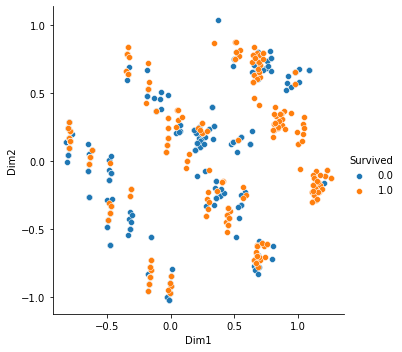

In [11]:
plot_data = np.hstack((X_PCA,y.reshape(len(y),1)))
    
plot_df = pd.DataFrame(plot_data,columns=['Dim1','Dim2','Survived'])
    
sns.FacetGrid(plot_df,hue="Survived",height=5).map(sns.scatterplot,"Dim1","Dim2").add_legend()

In [12]:
from sklearn.decomposition import KernelPCA

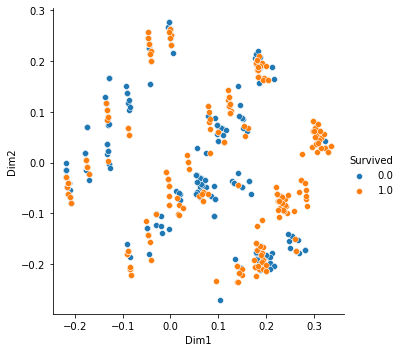

In [13]:
X, y = get_Xy_to_numpy(data)
min_max_scaler = preprocessing.MinMaxScaler().fit(X)
X = min_max_scaler.transform(X)
pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)
pca.fit(X)
X_PCA = pca.transform(X)

plot_data = np.hstack((X_PCA,y.reshape(len(y),1)))  
plot_df = pd.DataFrame(plot_data,columns=['Dim1','Dim2','Survived']) 
sns.FacetGrid(plot_df,hue="Survived",height=5).map(sns.scatterplot,"Dim1","Dim2").add_legend()

In [14]:
from sklearn.manifold import TSNE

In [15]:
tsne = TSNE(n_components=2,
            perplexity=30,
            random_state=0,
            n_iter=5000,
            learning_rate=200)


X, y = get_Xy_to_numpy(data)
min_max_scaler = preprocessing.MinMaxScaler().fit(X)
X = min_max_scaler.transform(X)
X_tsne = tsne.fit_transform(X)

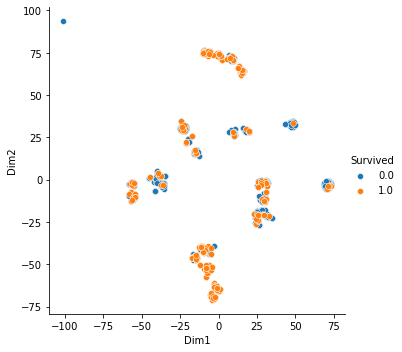

In [16]:
plot_data = np.hstack((X_tsne,y.reshape(len(y),1)))
    
plot_df = pd.DataFrame(plot_data,columns=['Dim1','Dim2','Survived'])
    
sns.FacetGrid(plot_df,hue="Survived",height=5).map(sns.scatterplot,"Dim1","Dim2").add_legend()

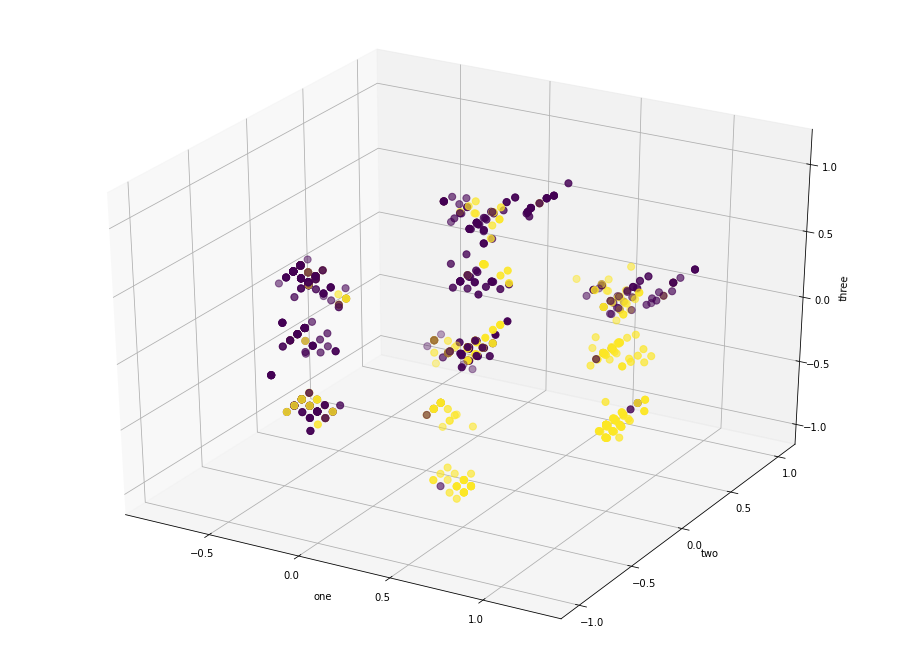

In [17]:
pca = PCA(n_components=3)

X, y = get_Xy_to_numpy(data)
min_max_scaler = preprocessing.MinMaxScaler().fit(X)
X = min_max_scaler.transform(X)
pca.fit(X)
X_PCA = pca.transform(X)

plot_data = np.hstack((X_PCA,y.reshape(len(y),1)))
    
plot_df = pd.DataFrame(plot_data,columns=['Dim1','Dim2','Dim3', 'Survived'])
ax = plt.figure(figsize=(16,12)).gca(projection='3d')
ax.scatter(
    xs=plot_df['Dim1'], 
    ys=plot_df['Dim2'], 
    zs=plot_df['Dim3'], 
    c=plot_df["Survived"], 
    cmap='viridis',s=50
)
ax.set_xlabel('one')
ax.set_ylabel('two')
ax.set_zlabel('three')
plt.show()

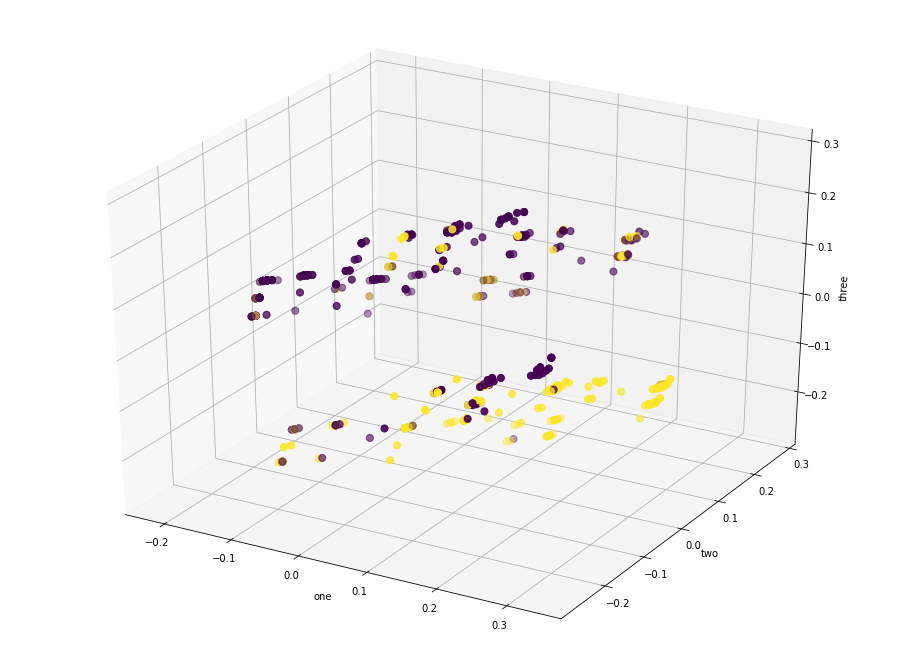

In [18]:
X, y = get_Xy_to_numpy(data)
min_max_scaler = preprocessing.MinMaxScaler().fit(X)
X = min_max_scaler.transform(X)
pca = KernelPCA(n_components=3, kernel="rbf", gamma=0.04)
pca.fit(X)
X_PCA = pca.transform(X)

plot_data = np.hstack((X_PCA,y.reshape(len(y),1)))
    
plot_df = pd.DataFrame(plot_data,columns=['Dim1','Dim2','Dim3', 'Survived'])
ax = plt.figure(figsize=(16,12)).gca(projection='3d')
ax.scatter(
    xs=plot_df['Dim1'], 
    ys=plot_df['Dim2'], 
    zs=plot_df['Dim3'], 
    c=plot_df["Survived"], 
    cmap='viridis',s=50
)
ax.set_xlabel('one')
ax.set_ylabel('two')
ax.set_zlabel('three')
plt.show()

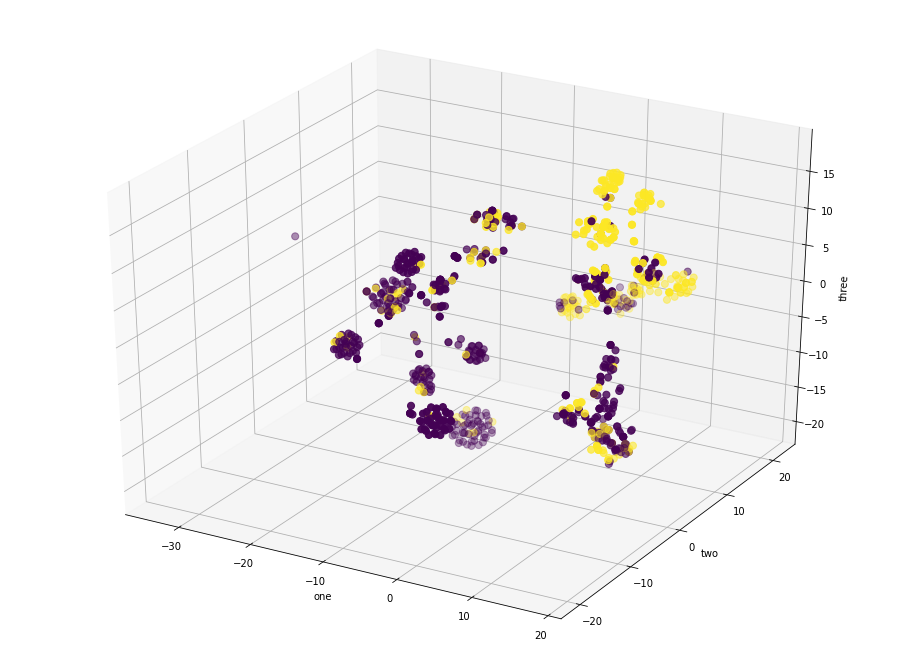

In [19]:
tsne = TSNE(n_components=3,
            perplexity=30,
            random_state=0,
            n_iter=5000,
            learning_rate=200)
X, y = get_Xy_to_numpy(data)
min_max_scaler = preprocessing.MinMaxScaler().fit(X)
X = min_max_scaler.transform(X)
X_tsne = tsne.fit_transform(X)

plot_data = np.hstack((X_tsne,y.reshape(len(y),1)))
    
plot_df = pd.DataFrame(plot_data,columns=['Dim1','Dim2','Dim3', 'Survived'])
ax = plt.figure(figsize=(16,12)).gca(projection='3d')
ax.scatter(
    xs=plot_df['Dim1'], 
    ys=plot_df['Dim2'], 
    zs=plot_df['Dim3'], 
    c=plot_df["Survived"], 
    cmap='viridis',s=50
)
ax.set_xlabel('one')
ax.set_ylabel('two')
ax.set_zlabel('three')
plt.show()

In [20]:
train, test = split(data)
train_X, train_Y, test_X, test_Y = to_numpy(train, test)
min_max_scaler = preprocessing.MinMaxScaler().fit(train_X)
train_X = min_max_scaler.transform(train_X)
test_X = min_max_scaler.transform(test_X)

In [21]:
keep_variance = [0.85, 0.9, 0.95, 0.99]
components = dict()

for keep_var in keep_variance:
    pca = PCA(keep_var, random_state=0)
    pca.fit(train_X)
    components[keep_var]= pca.n_components_
    train_X_pca = pca.transform(train_X)
    test_X_pca = pca.transform(test_X)

    acc, prec, rec, f = train_sk(train_X_pca, train_Y, test_X_pca, test_Y)
    accuracy['with_pca_'+ str(pca.n_components_) ] = acc
    precision['with_pca_'+ str(pca.n_components_) ] = prec
    recall['with_pca_'+ str(pca.n_components_)] = rec
    f1['with_pca_' + str(pca.n_components_) ] = f

[Testing set] Accuracy: 0.7430, Precision: 0.5797, Recall: 0.7018, F1: 0.6349
[Testing set] Accuracy: 0.7430, Precision: 0.5797, Recall: 0.7018, F1: 0.6349
[Testing set] Accuracy: 0.7542, Precision: 0.6087, Recall: 0.7119, F1: 0.6563
[Testing set] Accuracy: 0.7598, Precision: 0.6087, Recall: 0.7241, F1: 0.6614


In [22]:
components

{0.85: 4, 0.9: 4, 0.95: 6, 0.99: 7}

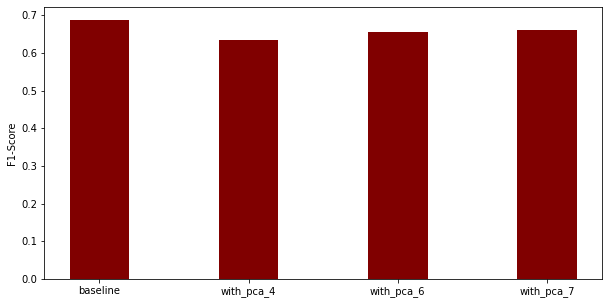

In [23]:
import matplotlib.pyplot as plt

scalers = list(f1.keys())
f_scores = list(f1.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(scalers, f_scores, color ='maroon',
        width = 0.4)
 
plt.xlabel("")
plt.ylabel("F1-Score")
plt.show()

In [24]:
f1

{'baseline': 0.6875,
 'with_pca_4': 0.634920634920635,
 'with_pca_6': 0.6562500000000001,
 'with_pca_7': 0.6614173228346457}